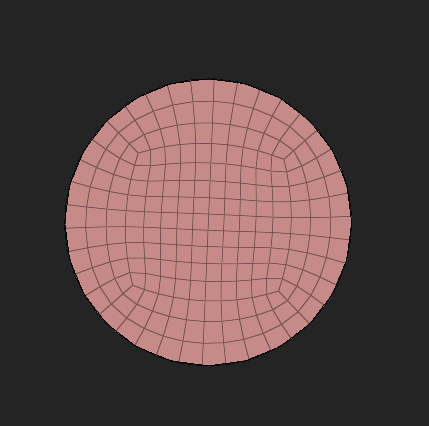

In [1]:
## import MOdules
import numpy as np
from stl import mesh
import math
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay 

In [2]:
### Cricle Dimension in mm
D=40
R=20
## density
Cir_den=36

##Initilize Grids
Gen_Grids=[]

In [3]:
## create a general grids
for x in np.linspace(-25,25,60):
    for y in np.linspace(-25,25,60):
        Gen_Grids.append([x,y])

## convert into array
Grids_1_array=np.array(Gen_Grids)

Plane_grid


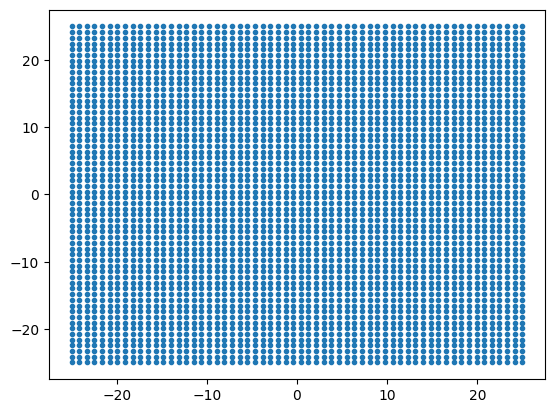

In [4]:
## Display plane Grids
print("Plane_grid")
plt.plot(Grids_1_array[:,0],Grids_1_array[:,1],'.')
plt.show()


In [5]:
## collect points only inside the circle
Incircle_grids=[]
outcircle_grids=[]
for i in Gen_Grids:
    if((((i[0])**2)+((i[1])**2))<=R**2):
        Incircle_grids.append([i[0],i[1]])
    else:
        outcircle_grids.append([i[0],i[1]])

### convert into array
Incircle_array=np.array(Incircle_grids)
#print(Incircle_grids)
outcircle_array=np.array(outcircle_grids)
#print(outcircle_grids)

# take a copy of incircle grids
in_circle_grid_for_del=[i for i in Incircle_grids]
print(in_circle_grid_for_del)

[[np.float64(-19.915254237288135), np.float64(-1.2711864406779654)], [np.float64(-19.915254237288135), np.float64(-0.4237288135593218)], [np.float64(-19.915254237288135), np.float64(0.4237288135593218)], [np.float64(-19.915254237288135), np.float64(1.2711864406779654)], [np.float64(-19.06779661016949), np.float64(-5.508474576271187)], [np.float64(-19.06779661016949), np.float64(-4.661016949152543)], [np.float64(-19.06779661016949), np.float64(-3.8135593220338997)], [np.float64(-19.06779661016949), np.float64(-2.966101694915256)], [np.float64(-19.06779661016949), np.float64(-2.1186440677966125)], [np.float64(-19.06779661016949), np.float64(-1.2711864406779654)], [np.float64(-19.06779661016949), np.float64(-0.4237288135593218)], [np.float64(-19.06779661016949), np.float64(0.4237288135593218)], [np.float64(-19.06779661016949), np.float64(1.2711864406779654)], [np.float64(-19.06779661016949), np.float64(2.118644067796609)], [np.float64(-19.06779661016949), np.float64(2.9661016949152526)], 

Incircle_grid


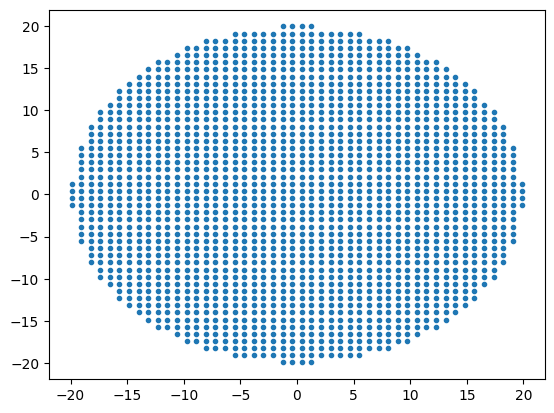

In [6]:
##plot incircle
print("Incircle_grid")
plt.plot(Incircle_array[:,0],Incircle_array[:,1],'.')
plt.show()

outcircle_grid


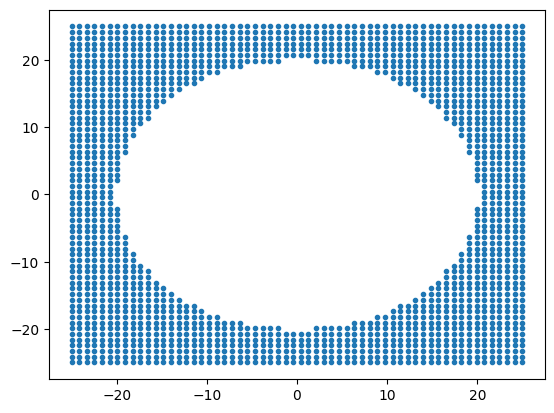

In [7]:
##plot outcircle
print("outcircle_grid")
plt.plot(outcircle_array[:,0],outcircle_array[:,1],'.')
plt.show()

In [8]:
##create elements _ Incircle
incircle_triamesh=Delaunay(Incircle_array)
incircle_mesh=incircle_triamesh.simplices

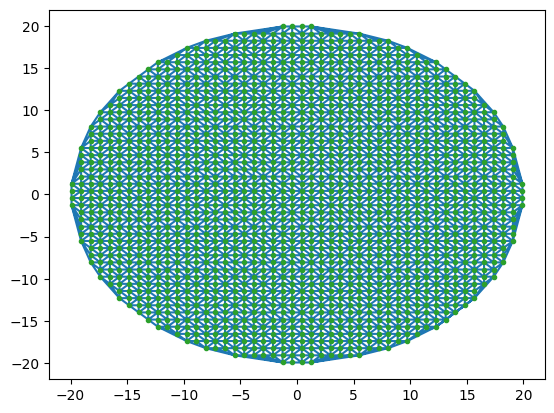

In [9]:
### display incircle Mesh
plt.triplot(Incircle_array[:,0],Incircle_array[:,1],incircle_mesh)
plt.plot(Incircle_array[:,0],Incircle_array[:,1],'.')
plt.show()

In [10]:
## add z cordinates
for i in Incircle_grids:
    i.append(0)

In [11]:
## export into stl
vertices=np.array(Incircle_grids)
circle_mesh=mesh.Mesh(np.zeros(incircle_mesh.shape[0],dtype=mesh.Mesh.dtype))
for i,m in enumerate(incircle_mesh):
    for j in range(3):
        circle_mesh.vectors[i][j]=vertices[m[j],:]
        
circle_mesh.save("E:\\circle_only.stl")

In [12]:
## create elements out circle_Mesh
outcircle_triamesh=Delaunay(outcircle_array)
outcircle_mesh=outcircle_triamesh.simplices

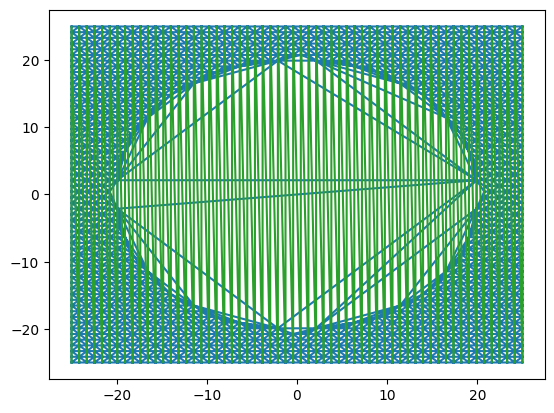

In [13]:
### display out circle 
plt.triplot(outcircle_array[:,0],outcircle_array[:,1],outcircle_mesh)
plt.plot(outcircle_array[:,0],outcircle_array[:,1])
plt.show()

In [14]:
### delete the elelments present in the circle
random_points=[]
for i in Incircle_grids:
    i.pop()
    random_points.append(i)
    
rp=tuple(outcircle_triamesh.find_simplex(random_points))

##delete unwanted elements
outcircle_final_mesh=np.delete(outcircle_triamesh.simplices,rp,0)

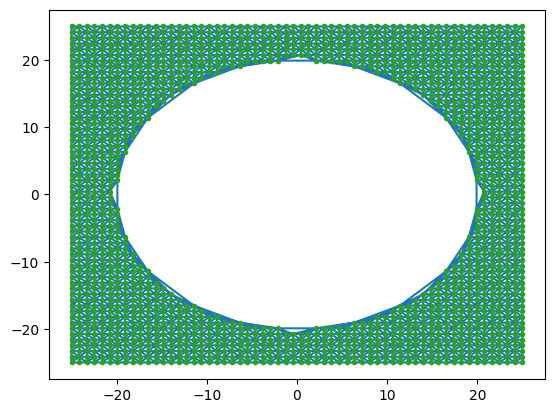

In [15]:
## display final mesh:
plt.triplot(outcircle_array[:,0],outcircle_array[:,1],outcircle_final_mesh)
plt.plot(outcircle_array[:,0],outcircle_array[:,1],'.')
plt.show()

In [16]:
## add z cordinate
for i in outcircle_grids:
    i.append(0)
print(outcircle_grids)

[[np.float64(-25.0), np.float64(-25.0), 0], [np.float64(-25.0), np.float64(-24.152542372881356), 0], [np.float64(-25.0), np.float64(-23.305084745762713), 0], [np.float64(-25.0), np.float64(-22.45762711864407), 0], [np.float64(-25.0), np.float64(-21.610169491525426), 0], [np.float64(-25.0), np.float64(-20.762711864406782), 0], [np.float64(-25.0), np.float64(-19.915254237288135), 0], [np.float64(-25.0), np.float64(-19.06779661016949), 0], [np.float64(-25.0), np.float64(-18.220338983050848), 0], [np.float64(-25.0), np.float64(-17.372881355932204), 0], [np.float64(-25.0), np.float64(-16.52542372881356), 0], [np.float64(-25.0), np.float64(-15.677966101694915), 0], [np.float64(-25.0), np.float64(-14.830508474576272), 0], [np.float64(-25.0), np.float64(-13.983050847457628), 0], [np.float64(-25.0), np.float64(-13.135593220338983), 0], [np.float64(-25.0), np.float64(-12.288135593220339), 0], [np.float64(-25.0), np.float64(-11.440677966101696), 0], [np.float64(-25.0), np.float64(-10.593220338983

In [17]:
## export out circle into stl
vertices=np.array(outcircle_grids)
outcircle=mesh.Mesh(np.zeros(outcircle_final_mesh.shape[0],dtype=mesh.Mesh.dtype))
for i,m in enumerate(outcircle_final_mesh):
    for j in range(3):
        outcircle.vectors[i][j]=vertices[m[j],:]

outcircle.save("E:\\outcircle_mesh.stl")

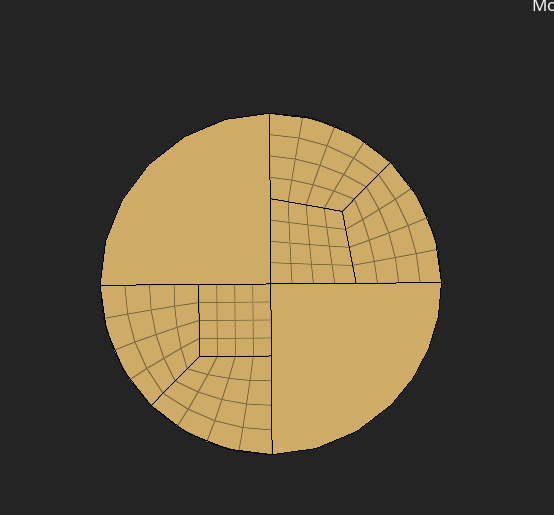